In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

df = pd.read_csv("Resources/cleaned_df.csv", low_memory=False)
df=df[["MONTH","ARR_DELAY","ORIGIN_AIRPORT","DAY_OF_WEEK","DEST_AIRPORT","ACTUAL_ELAPSED_TIME","CARRIER_DELAY","WEATHER_DELAY",
      "NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"]]
df_outbound=df.loc[df["ORIGIN_AIRPORT"]=="Minneapolis-Saint Paul International Airport",:]
df_inbound=df.loc[df["DEST_AIRPORT"]=="Minneapolis-Saint Paul International Airport",:]

Weekdays=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
Months = ["Jan", "Feb", "March", "Apr", "May", "Jun", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

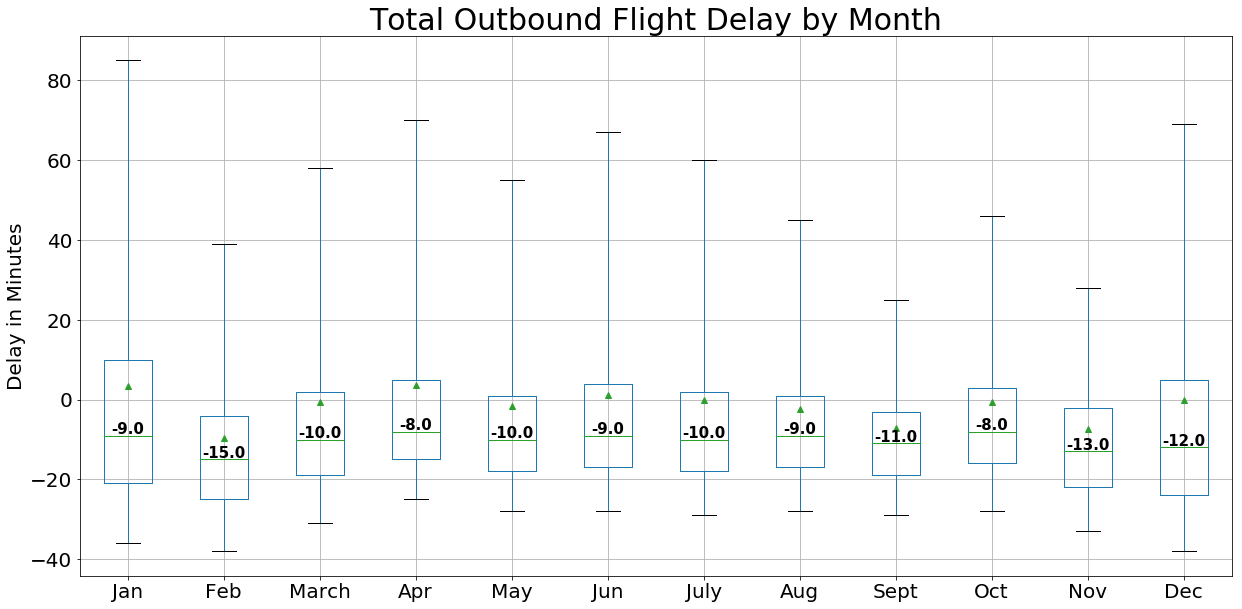

In [13]:
box1=df_outbound.boxplot("ARR_DELAY",by="MONTH",figsize=(20,10), showfliers=False, showmeans = True, whis = [5,95], fontsize=20)
# box1.set_ylim(-80,80)
box1.set_xticklabels(Months, fontsize=20)
box1.set_ylabel("Delay in Minutes", fontsize=20)
box1.set_xlabel("")
box1.set_title("Total Outbound Flight Delay by Month", fontsize=30)
box1.get_figure().suptitle('')

# Label medians
out_delay_by_month_mean = df_outbound.groupby(["MONTH"]).median()
out_mean_values = np.round(out_delay_by_month_mean["ARR_DELAY"].values,2)
out_mean_values_str = [str(x) for x in out_mean_values]

out_pos = range(0,len(out_mean_values_str)+1)
for tick,label in zip(out_pos,box1.get_xticklabels()):
    box1.text(out_pos[tick+1], out_mean_values[tick]+0.5, out_mean_values_str[tick], 
            horizontalalignment='center', color='k', weight='semibold', fontsize=15)

# Save Plot   
plt.savefig("Resources/Outbound_Month_Delay.png")
plt.show()

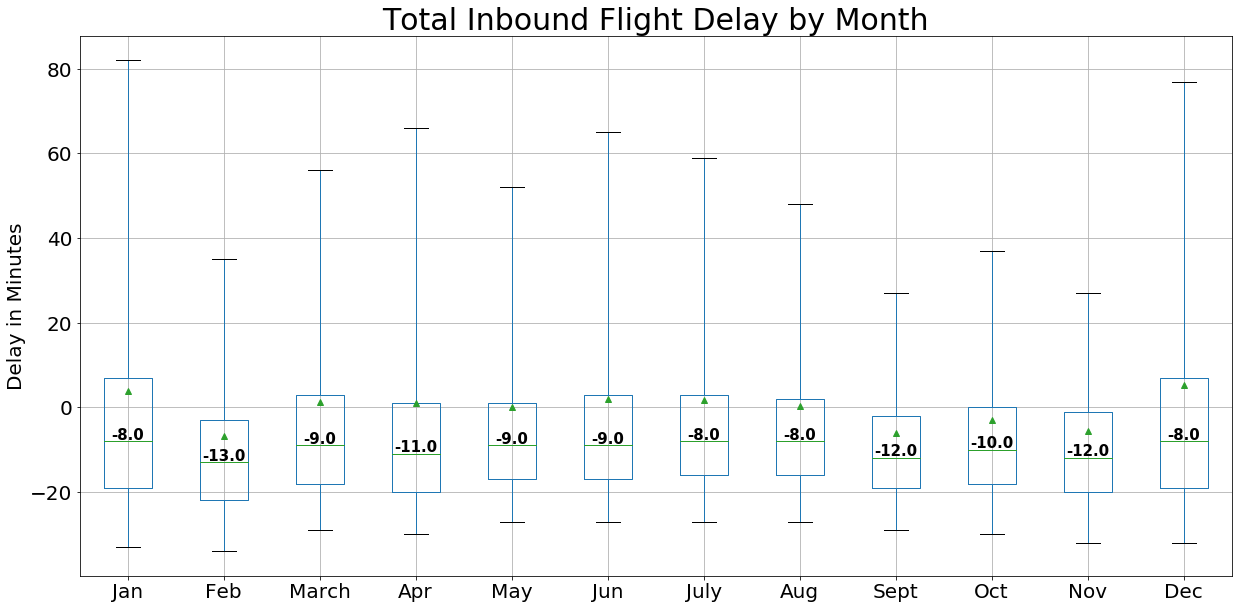

In [12]:
box2=df_inbound.boxplot("ARR_DELAY",by="MONTH",figsize=(20,10), showfliers=False, showmeans = True, whis = [5,95],fontsize=20 )
# box2.set_ylim(-90,90)
box2.set_xticklabels(Months, fontsize=20)
box2.set_ylabel("Delay in Minutes", fontsize=20)
box2.set_xlabel("")
box2.set_title("Total Inbound Flight Delay by Month", fontsize=30)
box2.get_figure().suptitle('')


# Label medians
in_delay_by_month_mean = df_inbound.groupby(["MONTH"]).median()
in_mean_values = np.round(in_delay_by_month_mean["ARR_DELAY"].values,2)
in_mean_values_str = [str(x) for x in in_mean_values]
in_pos = range(0,len(in_mean_values_str)+1)

for tick,label in zip(in_pos,box2.get_xticklabels()):
    box2.text(in_pos[tick+1], in_mean_values[tick]+0.5, in_mean_values_str[tick], 
            horizontalalignment='center', color='k', weight='semibold', fontsize=15)

# Save figure
plt.savefig("Resources/Inbound_Month_Delay.png")
plt.show()

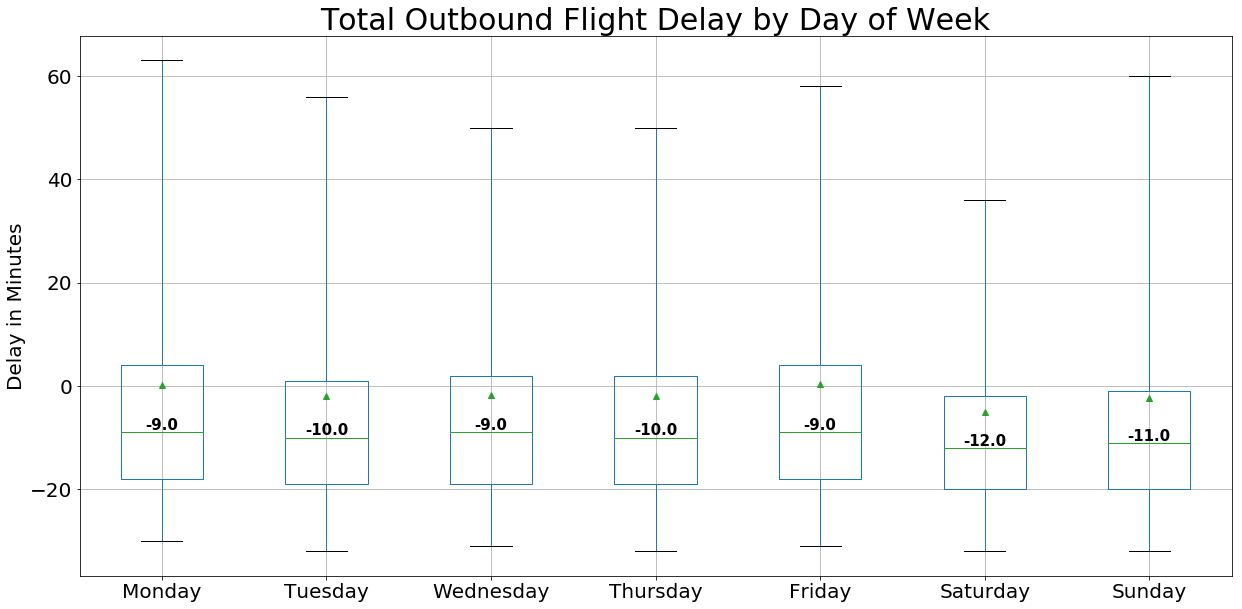

In [42]:
box3=df_outbound.boxplot("ARR_DELAY",by="DAY_OF_WEEK",figsize=(20,10), showfliers=False, showmeans = True, whis = [5,95], fontsize=20)
# box3.set_ylim(-60,70)
box3.set_xticklabels(Weekdays, fontsize=20)
box3.set_ylabel("Delay in Minutes", fontsize=20)
box3.set_xlabel("")
box3.set_title("Total Outbound Flight Delay by Day of Week", fontsize=30)
box3.get_figure().suptitle('')

# Label medians
out_delay_by_day_mean = df_outbound.groupby(["DAY_OF_WEEK"]).median()
out_day_mean_values = np.round(out_delay_by_day_mean["ARR_DELAY"].values,2)
out_day_mean_values_str = [str(x) for x in out_day_mean_values]
out_day_pos = range(0,len(out_day_mean_values_str)+1)

for tick,label in zip(out_day_pos,box3.get_xticklabels()):
    box3.text(out_day_pos[tick+1], out_day_mean_values[tick]+0.5, out_day_mean_values_str[tick], 
            horizontalalignment='center', color='k', weight='semibold', fontsize=15)

# Save Fig
plt.savefig("Resources/Outbound_Day_Delay.png")
plt.show()


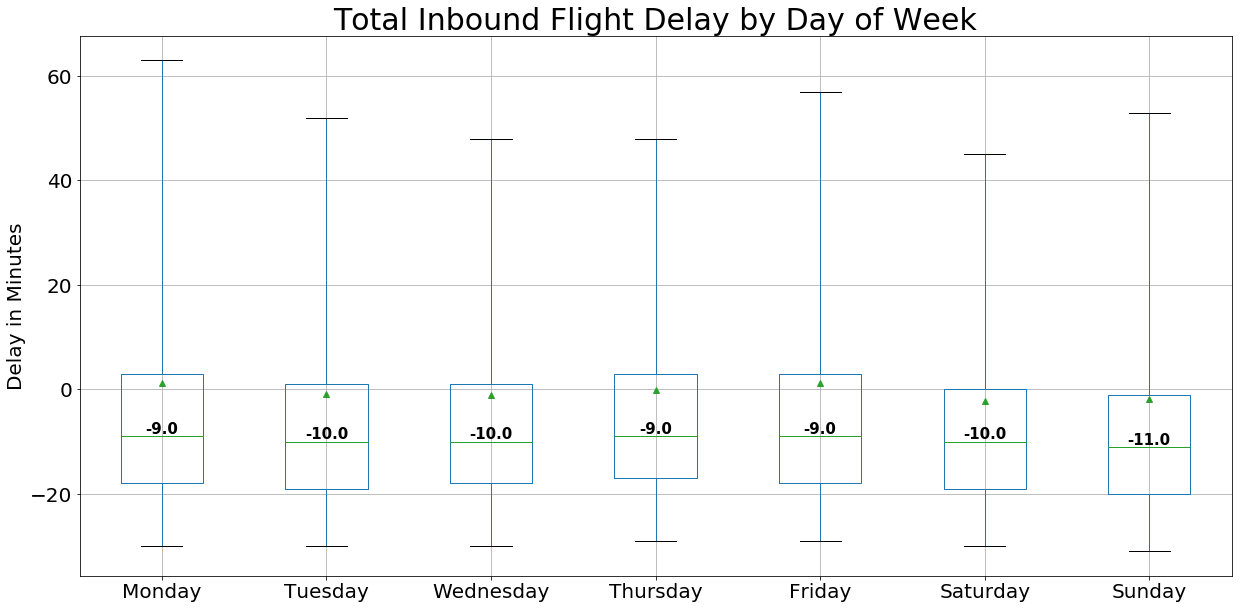

In [16]:
box4=df_inbound.boxplot("ARR_DELAY",by="DAY_OF_WEEK",figsize=(20,10), showfliers=False, showmeans = True, whis = [5,95], fontsize=20)
# box4.set_ylim(-70,70)
box4.set_xticklabels(Weekdays, fontsize=20)
box4.set_ylabel("Delay in Minutes", fontsize=20)
box4.set_xlabel("")
box4.set_title("Total Inbound Flight Delay by Day of Week", fontsize=30)
box4.get_figure().suptitle('')

# Label medians
in_delay_by_day_mean = df_inbound.groupby(["DAY_OF_WEEK"]).median()
in_day_mean_values = np.round(in_delay_by_day_mean["ARR_DELAY"].values,2)
in_day_mean_values_str = [str(x) for x in in_day_mean_values]
in_day_pos = range(0,len(in_day_mean_values_str)+1)

for tick,label in zip(in_day_pos,box4.get_xticklabels()):
    box4.text(in_day_pos[tick+1], in_day_mean_values[tick]+0.5, in_day_mean_values_str[tick], 
            horizontalalignment='center', color='k', weight='semibold', fontsize=15)

# Save Fig
plt.savefig("Resources/Inbound_Day_Delay.png")
plt.show()

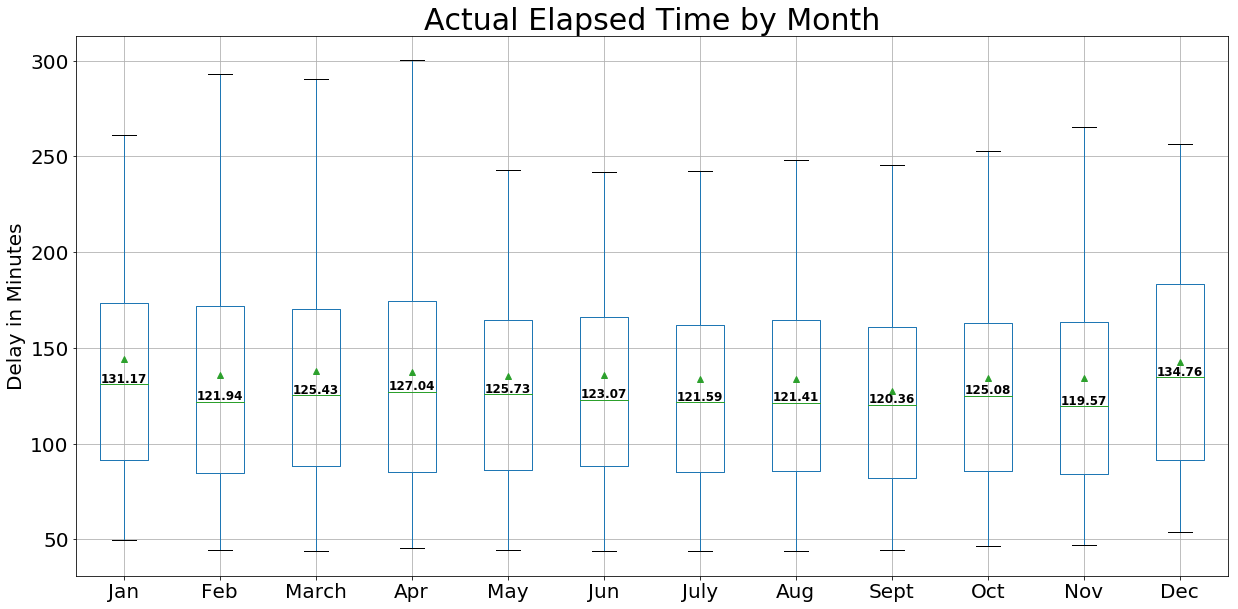

In [21]:
df_elapsed_month=df_outbound.groupby(["MONTH","DEST_AIRPORT"]).mean()
df_elapsed_month=df_elapsed_month.reset_index(drop=False)

box5=df_elapsed_month.boxplot("ACTUAL_ELAPSED_TIME",by=["MONTH"],figsize=(20,10), showfliers=False, showmeans=True, fontsize=20)
box5.set_xticklabels(Months, fontsize=20)
box5.set_ylabel("Delay in Minutes",fontsize=20)
box5.set_xlabel("")
box5.set_title("Actual Elapsed Time by Month", fontsize=30)
box5.get_figure().suptitle('')

# Label medians
out_aet_by_month_mean = df_outbound.groupby(["DEST_AIRPORT","MONTH"]).mean().reset_index()
out_aet_by_month_mean2 = out_aet_by_month_mean.groupby(["MONTH"]).median()
out_aet_mean_values = np.round(out_aet_by_month_mean2["ACTUAL_ELAPSED_TIME"].values,2)
out_aet_mean_values_str = [str(x) for x in out_aet_mean_values]
out_aet_pos = range(0,len(out_aet_mean_values_str)+1)

for tick,label in zip(out_aet_pos,box5.get_xticklabels()):
    box5.text(out_aet_pos[tick+1], out_aet_mean_values[tick]+1.0, out_aet_mean_values_str[tick], 
            horizontalalignment='center', color='k', weight='semibold', fontsize=12)

# Save Fig
plt.savefig("Resources/AET_Month_Delay.png")
plt.show()

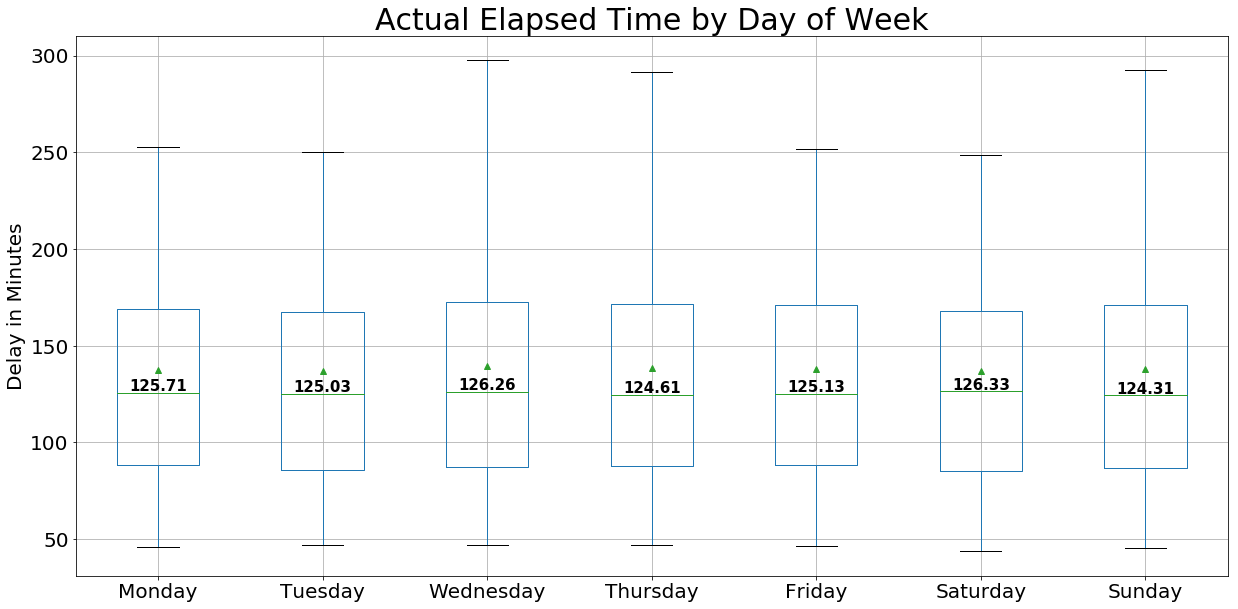

In [24]:
df_elapsed_day=df_outbound.groupby(["DAY_OF_WEEK","DEST_AIRPORT"]).mean()
df_elapsed_day=df_elapsed_day.reset_index(drop=False)

box6=df_elapsed_day.boxplot("ACTUAL_ELAPSED_TIME",by=["DAY_OF_WEEK"],figsize=(20,10), showfliers=False, showmeans=True, fontsize=20)
box6.set_xticklabels(Weekdays, fontsize=20)
box6.set_ylabel("Delay in Minutes", fontsize=20)
box6.set_xlabel("")
box6.set_title("Actual Elapsed Time by Day of Week", fontsize=30)
box6.get_figure().suptitle('')

# Label medians
out_aet_by_day_mean = df_outbound.groupby(["DEST_AIRPORT","DAY_OF_WEEK"]).mean().reset_index()
out_aet_by_day_mean2 = out_aet_by_day_mean.groupby(["DAY_OF_WEEK"]).median()
day_out_aet_mean_values = np.round(out_aet_by_day_mean2["ACTUAL_ELAPSED_TIME"].values,2)
day_out_aet_mean_values_str = [str(x) for x in day_out_aet_mean_values]
day_out_aet_pos = range(0,len(day_out_aet_mean_values_str)+1)

for tick,label in zip(day_out_aet_pos,box6.get_xticklabels()):
    box6.text(day_out_aet_pos[tick+1], day_out_aet_mean_values[tick]+1.0, day_out_aet_mean_values_str[tick], 
            horizontalalignment='center', color='k', weight='semibold', fontsize=15)

# Save Fig
plt.savefig("Resources/AET_Day_Delay.png")
plt.show()

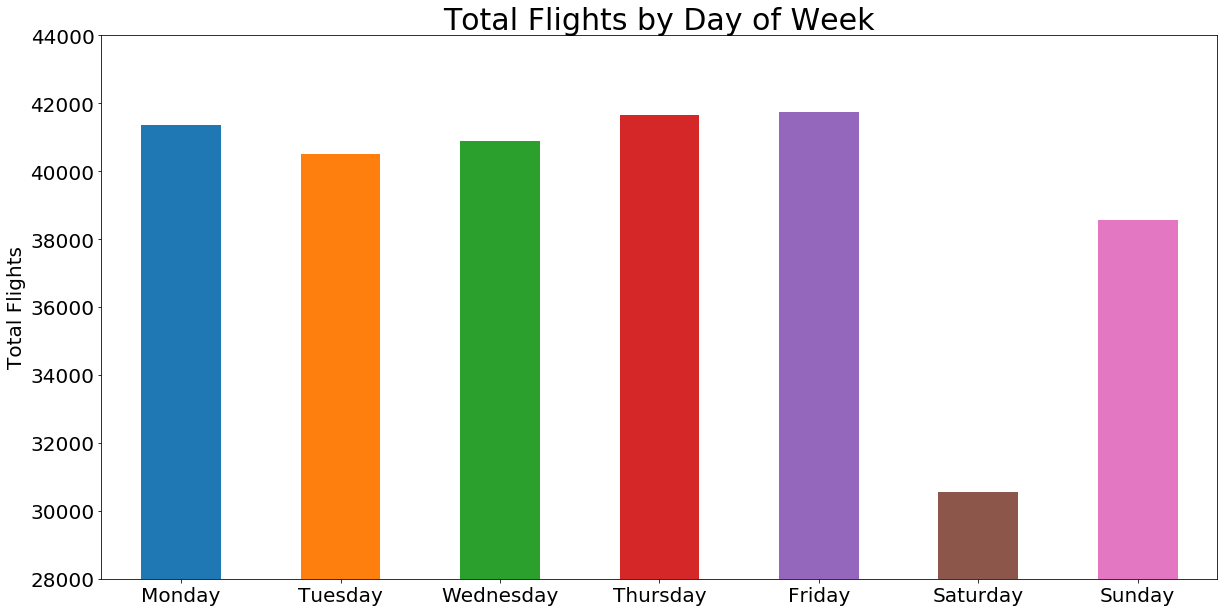

In [25]:
total_day=df.groupby("DAY_OF_WEEK").count()
total_day=total_day.reset_index(drop=False)
box=total_day.plot.bar(x="DAY_OF_WEEK",y="MONTH",figsize=(20,10), legend=False, fontsize=20)
box.set_ylim(28000,44000)
box.set_xticklabels(Weekdays,rotation=0, fontsize=20)
box.set_ylabel("Total Flights", fontsize=20)
box.set_xlabel("")
box.set_title("Total Flights by Day of Week", fontsize=30)
box.get_figure().suptitle('')
plt.savefig("Resources/Flight_Total_Day.png")
plt.show()

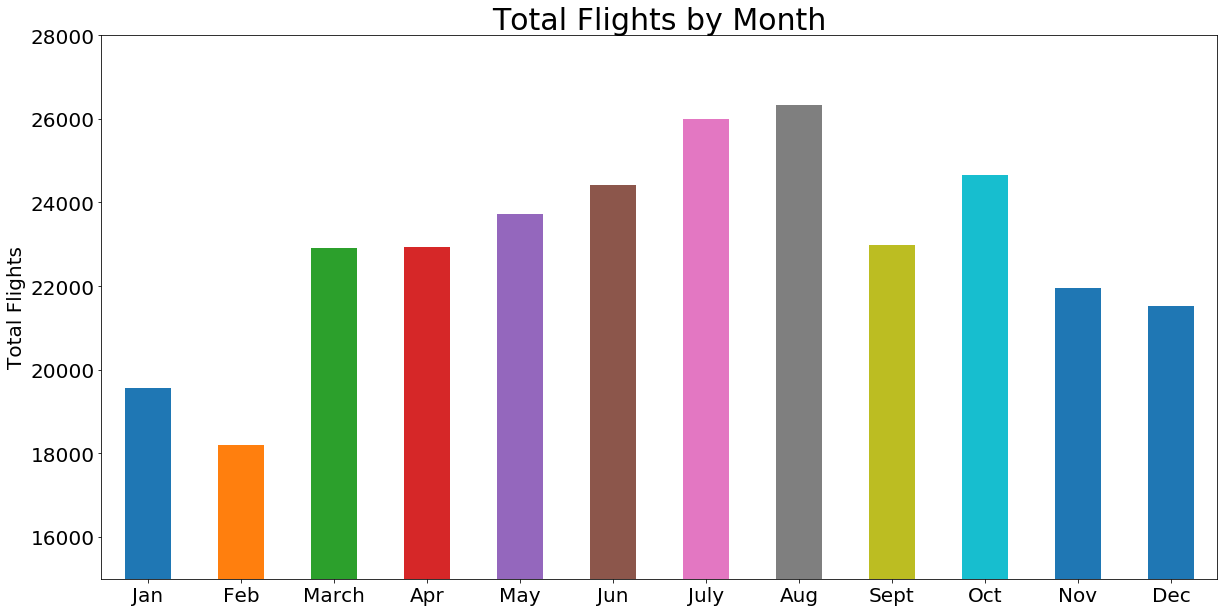

In [26]:
total_month=df.groupby("MONTH").count()
total_month=total_month.reset_index(drop=False)
box1=total_month.plot.bar(x="MONTH",y="DAY_OF_WEEK",figsize=(20,10), legend=False, fontsize=20)
box1.set_ylim(15000,28000)
box1.set_xticklabels(Months,rotation=0, fontsize=20)
box1.set_ylabel("Total Flights", fontsize=20)
box1.set_xlabel("")
box1.set_title("Total Flights by Month", fontsize=30)
box1.get_figure().suptitle('')
plt.savefig("Resources/Flight_Total_Month.png")
plt.show()

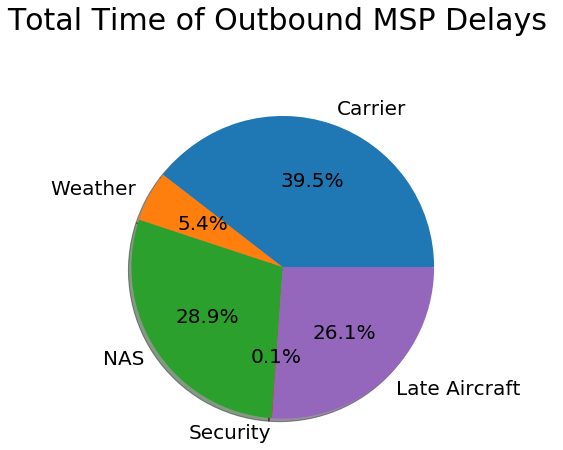

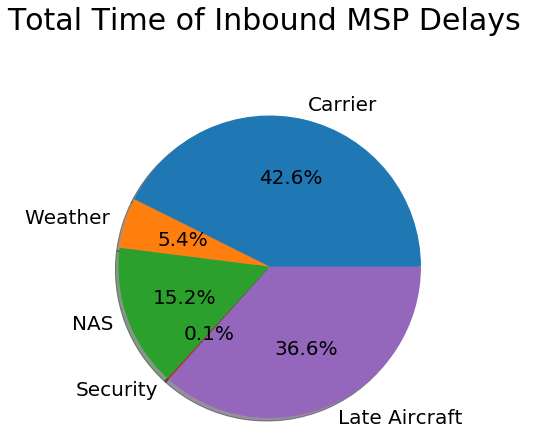

In [38]:
df_outbound_delay=df_outbound[["CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"]].fillna(0).sum()
df_inbound_delay=df_inbound[["CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"]].fillna(0).sum()

plt.figure(figsize=(6,6))
plt.pie(df_outbound_delay, labels=["Carrier","Weather","NAS","Security","Late Aircraft"], autopct="%1.1f%%", shadow=True, textprops = {'fontsize':20})
plt.title("Total Time of Outbound MSP Delays \n \n", fontsize=30)
plt.axis("equal")
plt.savefig("Resources/Total_outbound_delay.png")
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df_inbound_delay, labels=["Carrier","Weather","NAS","Security","Late Aircraft"], autopct="%1.1f%%", shadow=True, textprops = {'fontsize':20})
plt.title("Total Time of Inbound MSP Delays \n \n", fontsize=30 )
plt.axis("equal")
plt.savefig("Resources/Total_inbound_delay.png")
plt.show()

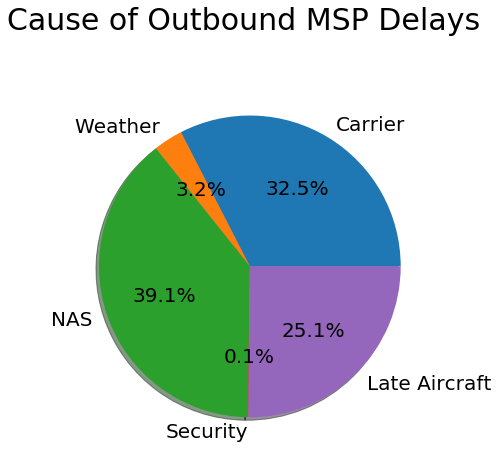

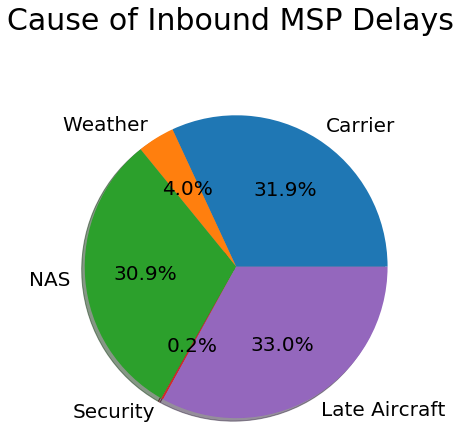

In [41]:
df_outbound_delay=df_outbound[["CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"]].replace({0:np.nan}).count()
df_inbound_delay=df_inbound[["CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"]].replace({0:np.nan}).count()

plt.figure(figsize=(6,6))
plt.pie(df_outbound_delay, labels=["Carrier","Weather","NAS","Security","Late Aircraft"], autopct="%1.1f%%", shadow=True, textprops = {'fontsize':20})
plt.title("Cause of Outbound MSP Delays \n\n", fontsize = 30)
plt.axis("equal")
plt.savefig("Resources/Percent_outbound_delay.png")
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df_inbound_delay, labels=["Carrier","Weather","NAS","Security","Late Aircraft"], autopct="%1.1f%%", shadow=True, textprops = {'fontsize':20})
plt.title("Cause of Inbound MSP Delays \n\n", fontsize = 30)
plt.axis("equal")
plt.savefig("Resources/Percent_inbound_delay.png")
plt.show()